## <button><a href = "https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification/download?datasetVersionNumber=1">Dataset</a></button>

### import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### unpack everything and store it in different variables

In [4]:
cloudy = glob('cloudy/*.jpg')
desert = glob('desert/*.jpg')
green_area = glob('green_area/*.jpg')
water = glob('water/*.jpg')

#### store every image with their respective labels

In [9]:
images = []
labels = []

for i in cloudy:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in desert:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in green_area:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in water:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

#### define the classes

In [10]:
classes = {0:'cloudy', 1:'desert', 2:'green_area', 3:'water'}

#### plot some the images

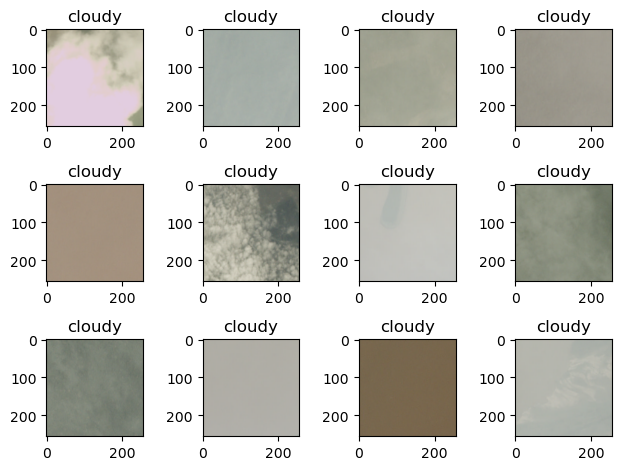

In [13]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

#### shuffle images and labels

In [14]:
images, labels = shuffle(images, labels)

#### plot the images again

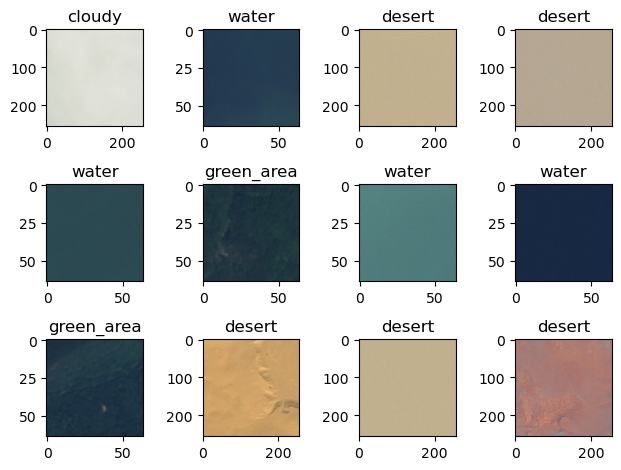

In [15]:
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

#### Resize the images and store it in variable "X"

In [16]:
X = []
for i in images:
    X.append(resize(i, (224, 224, 3)))

#### Split it into independent and target variables

In [17]:
X = np.array(X)
y = np.array(labels)

#### Split the dataset into training and testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)

#### Build the model

In [19]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(layers.MaxPool2D())

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())

model.add(layers.Dense(88, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))

#### Compile it

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 88)                1

#### Train the model

In [22]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
111/111 [==============================] - 79s 678ms/step - loss: 0.5886 - accuracy: 0.8153 - val_loss: 0.2238 - val_accuracy: 0.9086
Epoch 2/10
111/111 [==============================] - 76s 682ms/step - loss: 0.2069 - accuracy: 0.9122 - val_loss: 0.1495 - val_accuracy: 0.9409
Epoch 3/10
111/111 [==============================] - 76s 687ms/step - loss: 0.1684 - accuracy: 0.9266 - val_loss: 0.1710 - val_accuracy: 0.9301
Epoch 4/10
111/111 [==============================] - 79s 708ms/step - loss: 0.1855 - accuracy: 0.9195 - val_loss: 0.1124 - val_accuracy: 0.9624
Epoch 5/10
111/111 [==============================] - 79s 713ms/step - loss: 0.1521 - accuracy: 0.9329 - val_loss: 0.1098 - val_accuracy: 0.9624
Epoch 6/10
111/111 [==============================] - 82s 738ms/step - loss: 0.1374 - accuracy: 0.9377 - val_loss: 0.1277 - val_accuracy: 0.9516
Epoch 7/10
111/111 [==============================] - 82s 736ms/step - loss: 0.1783 - accuracy: 0.9235 - val_loss: 0.1606 - val_ac

#### Make prediction

In [23]:
y_pred = model.predict(X_test)

60/60 [==============================] - 8s 124ms/step


#### Extract the index of the highest probabilty

In [24]:
y_pred = [np.argmax(i) for i in y_pred]

#### Accuracy Score

In [25]:
accuracy_score(y_test, y_pred)

0.9342036553524804

#### Plot the confusion matrix with heatmap

<Axes: >

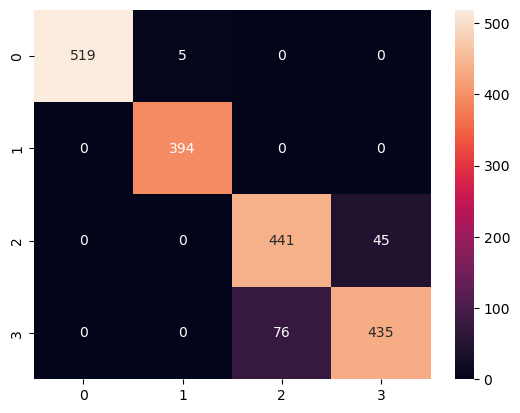

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')

#### Print the classification report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       524
           1       0.99      1.00      0.99       394
           2       0.85      0.91      0.88       486
           3       0.91      0.85      0.88       511

    accuracy                           0.93      1915
   macro avg       0.94      0.94      0.94      1915
weighted avg       0.94      0.93      0.93      1915

